In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

COVID_19 DATA

#### (a)Use the available data for 2021 for Angola, to predict the number of New_cases for November 20, 2021 and November 21, 2021 for Angola.

In [13]:
cov=pd.read_csv("WHO-COVID-19-global-data.csv")
cov.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0


In [14]:
acov=cov[cov["Country"]=="Angola"]
ndata=acov[acov["Date_reported"]=="2021-11-01"]
id=ndata.index[0]
agd=acov.loc[id:,:]
agd

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
4093,2021-11-01,AO,Angola,AFRO,59,64433,2,1710
4094,2021-11-02,AO,Angola,AFRO,25,64458,3,1713
4095,2021-11-03,AO,Angola,AFRO,29,64487,0,1713
4096,2021-11-04,AO,Angola,AFRO,46,64533,3,1716
4097,2021-11-05,AO,Angola,AFRO,50,64583,2,1718
4098,2021-11-06,AO,Angola,AFRO,29,64612,1,1719
4099,2021-11-07,AO,Angola,AFRO,42,64654,0,1719
4100,2021-11-08,AO,Angola,AFRO,20,64674,1,1720
4101,2021-11-09,AO,Angola,AFRO,50,64724,1,1721
4102,2021-11-10,AO,Angola,AFRO,38,64762,2,1723


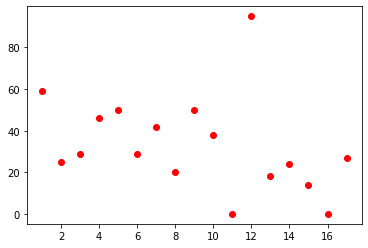

In [15]:
x=[x for x in range(1,len(agd)+1)]
x=np.array(x)
X=x.reshape(-1,1)
y=agd.iloc[:,4].values
y=y.reshape(-1,1)


plt.plot(X,y,"ro");


##### Linear regression

In [16]:
reg_model1 = LinearRegression()  
reg_model1.fit(X, y) #training the algorithm

LinearRegression()

Model coefficients
[47.125]
[[-1.53676471]]
    Actual  Predicted
0       59  45.588235
1       25  44.051471
2       29  42.514706
3       46  40.977941
4       50  39.441176
5       29  37.904412
6       42  36.367647
7       20  34.830882
8       50  33.294118
9       38  31.757353
10       0  30.220588
11      95  28.683824
12      18  27.147059
13      24  25.610294
14      14  24.073529
15       0  22.536765
16      27  21.000000


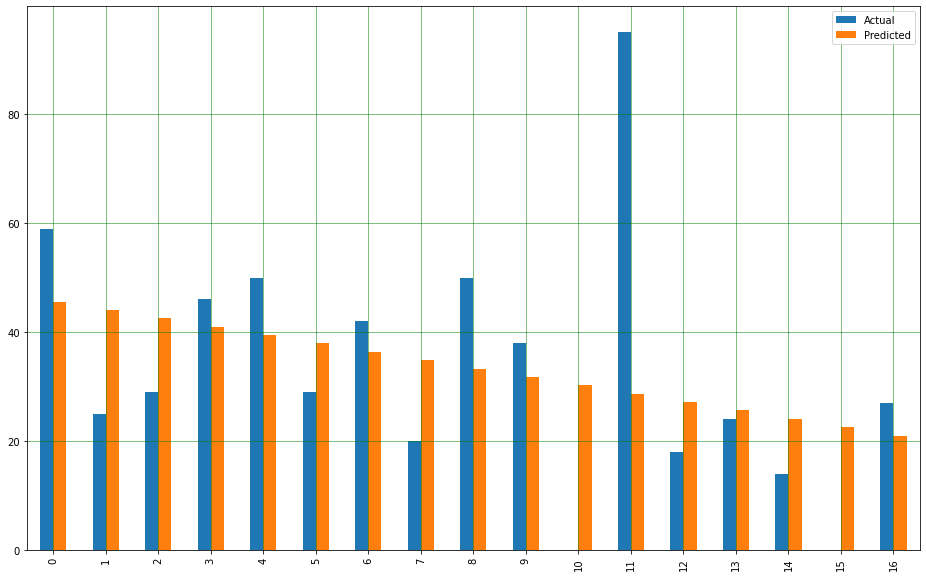

In [17]:
#To retrieve the intercept:
print("Model coefficients")
print(reg_model1.intercept_)
#For retrieving the slope:
print(reg_model1.coef_)
y_pred = reg_model1.predict(X)
df = pd.DataFrame({'Actual': y.flatten(), 'Predicted': y_pred.flatten()})
print(df)
df1 = df
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()


#### Prediction of New_cases for Angola on 20th and 21st November

In [70]:
pred20=reg_model1.predict([[20]])
pred21=reg_model1.predict([[21]])
print("New_cases on 20th November is :",pred20[0])
print("New_cases on 21st November is :",pred21[0])

New_cases on 20th November is : [16.38970588]
New_cases on 21st November is : [14.85294118]


##### Ridge regression

In [71]:
#RIDGE Regression for Angola 

# import ridge regression from sklearn library
from sklearn.linear_model import Ridge
 
# Train the model
ridgeR = Ridge(alpha = 1)
ridgeR.fit(X,y)
y_predr = ridgeR.predict(X)
 
# calculate mean square error
mean_squared_error_ridge = np.mean((y_predr - y)**2)
print(mean_squared_error_ridge)
 
# get ridge coefficient and print them
print(ridgeR.coef_)

444.35198242668525
[[-1.53300733]]


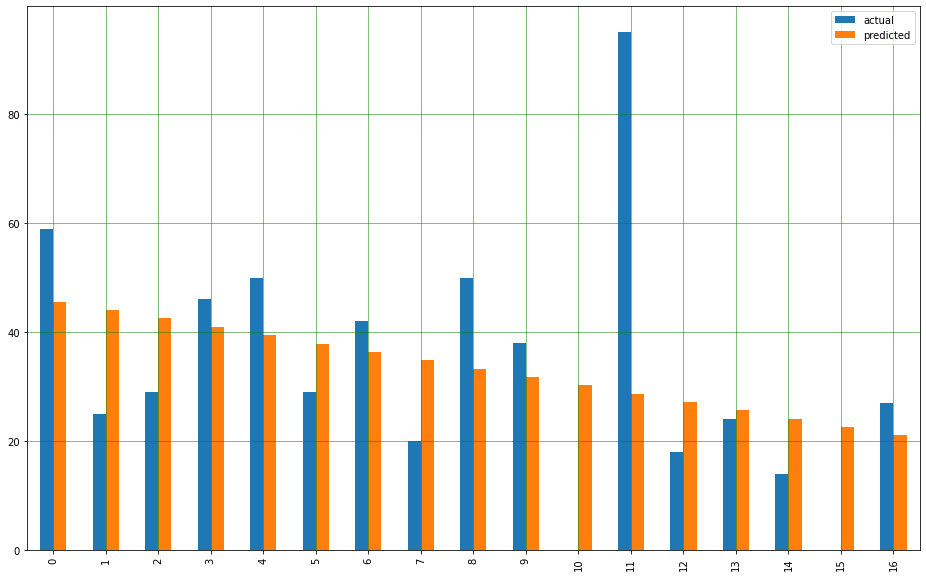

In [72]:
d= {"actual":y.flatten(), "predicted":y_predr.flatten()}
df2 = pd.DataFrame(d)
df2.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

#### (b) Considering the available data for 2021, what is the predicted average number of New_deathsfor the whole of Africa for November 20, 2021 and November 21, 2021?

In [73]:
#Extracting data for Africa

afcov=cov[cov["WHO_region"]=="AFRO"]
adata=afcov[afcov["Date_reported"]>="2021-11-01"]
nd=adata.groupby(['Date_reported']).mean()
y1=nd.iloc[:,2].values

#### Linear regression

In [74]:
reg_model2 = LinearRegression()  
reg_model2.fit(X,y1) #training the algorithm

LinearRegression()

Model coefficients
1.5625
[-0.00759804]
    Actual  Predicted
0     0.82   1.554902
1     1.04   1.547304
2     2.42   1.539706
3     1.68   1.532108
4     1.60   1.524510
5     1.68   1.516912
6     1.36   1.509314
7     1.12   1.501716
8     1.74   1.494118
9     2.36   1.486520
10    1.78   1.478922
11    1.44   1.471324
12    1.64   1.463725
13    0.88   1.456127
14    0.90   1.448529
15    1.18   1.440931
16    1.76   1.433333


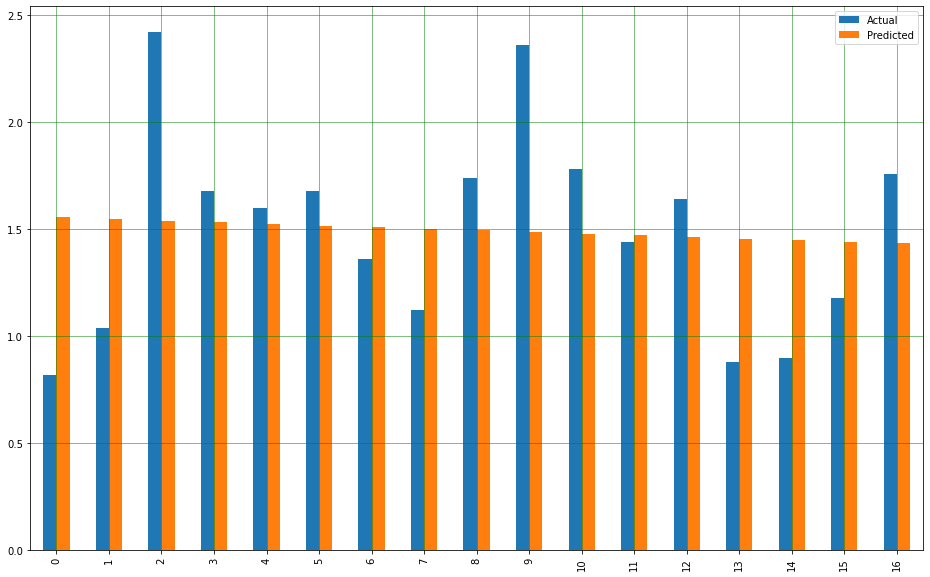

In [75]:
#To retrieve the intercept:
print("Model coefficients")
print(reg_model2.intercept_)
#For retrieving the slope:
print(reg_model2.coef_)
y_pred2 = reg_model2.predict(X)
df = pd.DataFrame({'Actual': y1.flatten(), 'Predicted': y_pred2.flatten()})
print(df)
df1 = df
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()


In [76]:
preda20=reg_model2.predict([[20]])
preda21=reg_model2.predict([[21]])
print("The predicted number of New_deaths on 20th November is :",preda20)
print("The predicted number of New_deaths on 21st November is :",preda21)

The predicted number of New_deaths on 20th November is : [1.41053922]
The predicted number of New_deaths on 21st November is : [1.40294118]


#### Coronary Heart Disease (CHD) in South Africa Data

#### (a) Upload this data set and replace non-number data with a reasonable numerical representation

In [77]:
chd1=pd.read_csv("SAheart.data")
chd1.head()

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


In [78]:
#Replacing non-munber with a reasonable numerical representation


chd1["famhist"].replace(to_replace={'Present': 1, 'Absent': 0}, value=None, inplace=True, limit=None, regex=False)
chd1

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,1,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,0,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,1,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,1,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,1,60,25.99,57.34,49,1
...,...,...,...,...,...,...,...,...,...,...,...
457,459,214,0.40,5.98,31.72,0,64,28.45,0.00,58,0
458,460,182,4.20,4.41,32.10,0,52,28.61,18.72,52,1
459,461,108,3.00,1.59,15.23,0,40,20.09,26.64,55,0
460,462,118,5.40,11.61,30.79,0,64,27.35,23.97,40,0


#### (b) Train a logistic regressor to tell if a patient has high risk of CHD or not.

In [41]:
#Exctracting data

Xh=chd1.iloc[:,1:10].values

yh = chd1.iloc[:,10].values
Xh_train, Xh_test, yh_train, yh_test = train_test_split(Xh, yh, test_size = 0.25, random_state = 0)

In [42]:
# Fitting Logistic Regression to the Training set
classifier = LogisticRegression(random_state = 0, solver='lbfgs', multi_class='auto')
classifier.fit(Xh_train, yh_train)

LogisticRegression(random_state=0)

In [43]:
# Predicting the Test set results
y_predc = classifier.predict(Xh_test)
# Predict probabilities
probs_y=classifier.predict_proba(Xh_test)### Print results 
probs_y = np.round(probs_y, 2)
probs_y
result = pd.DataFrame(probs_y, columns= np.unique(chd1.chd))
predictedt_index = [np.argmax(result.iloc[i,:]) for i in range(result.shape[0])]
predicted_names = [np.unique(chd1.chd)[i] for i in predictedt_index]
result.insert(loc=0, column="Test", value=yh_test)
result.insert(loc=1, column ='Predicted', value=predicted_names)
result.sample(10)

,Test,Predicted,0,1
95,1,1,0.25,0.75
91,0,0,0.65,0.35
78,0,0,0.95,0.05
29,1,1,0.35,0.65
61,0,0,0.66,0.34
89,0,0,0.63,0.37
45,1,0,0.84,0.16
104,0,0,0.77,0.23
86,0,1,0.35,0.65
32,1,0,0.83,0.17


In [46]:
#Confusion matrix
con_mat = confusion_matrix(yh_test, y_predc)
print(con_mat)

[[68  9]
 [23 16]]


In [47]:
print("Accuracy:",accuracy_score(yh_test, y_predc))

Accuracy: 0.7241379310344828


#### (c) Identify if the a patient with the following data is of high risk or not $x = [133, 3.3, 4.6, 34.5, present, 52, 30, 32, 20, 44]$.

In [49]:
xp=np.array([[133,3.3,4.6,34.5,1,52,30.32,20,44]])
classifier.predict(xp)

array([0], dtype=int64)

Hence the  patient with the given data is not of high risk of contracting coronary diseases

#### (d) Which are the most determinant factors for heart disease?

Feature: 0, Score: -0.01245
Feature: 1, Score: 0.09902
Feature: 2, Score: 0.09812
Feature: 3, Score: 0.06722
Feature: 4, Score: 0.73263
Feature: 5, Score: 0.02440
Feature: 6, Score: -0.16366
Feature: 7, Score: -0.00246
Feature: 8, Score: 0.03238


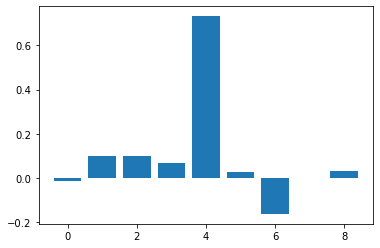

In [65]:
# get importance
importance = classifier.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Feature 4(family history) tends to be the most determinat factor for heart disease

#### (e) Does having a family history of coronary heart disease affect a patients chance of having coronary heart disease?

Yes ,because the feature importance plot bove indicates that family history of coronary heart disease affects a patients chance of having coronary heart disease